## Decision Tree
Here we use decision tree for classifying Iris data.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

import numpy as np
np.random.seed(42)

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
X = iris.data[:, 2:]
y = iris.target

'X' is the length and width of the petals.

In [5]:
tree_clf = DecisionTreeClassifier(max_depth=2)
#tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

'criterion' is the function to measure quality of a split. 'max_depth' is the maximum depth of the tree.

In [6]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
               out_file="iris_tree.dot",
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

'export_graphviz' makes the dot file of the decision tree.

In [8]:
import os
print(os.getcwd())  

/content


With this, we can figure out current path.

In [9]:
import graphviz

with open(os.getcwd() + "/iris_tree.dot") as f:
    dot_graph = f.read()

The path is where 'iris_tree.dot' is.

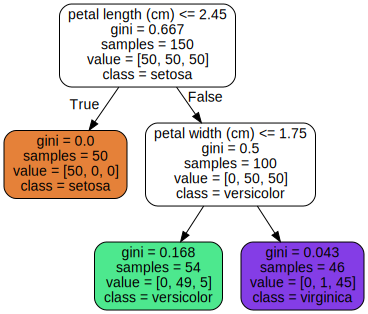

In [10]:
graphviz.Source(dot_graph)

Visualize the decision tree.

In [11]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [12]:
tree_clf.predict([[5, 1.5]])

array([1])

'predict_proba' shows the probability of class for the input. 'predict' shows the most probable class for the input.

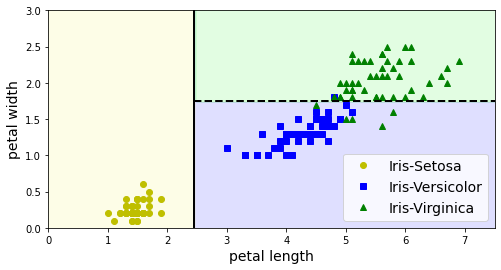

In [14]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("petal length", fontsize=14)
        plt.ylabel("petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y, legend=True)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)

plt.show()


Code for visualizing the data and the decision boundary. 'meshgrid' makes grid of the domain. 'ravel' makes x1 and x2 straight. 'c_' concatenates the two vertically arranged arrays. So X_new is the coordinates of the grid. y_pred is prediction result for X_new. 'ListedColormap' assigns colors we're going to use. 'contourf' fills area. alpha is for transparency.

Decision tree is sensitive to little change of data.

In [15]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)

X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=40, splitter='best')

Here we remove one Iris-Versicolor datum with the most wide petal width.

In [16]:
export_graphviz(tree_clf_tweaked,
               out_file="iris_tree_missing.dot",
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

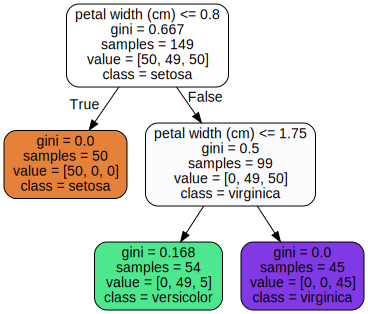

In [17]:
import graphviz

with open("iris_tree_missing.dot") as f:
    dot_graph_missing = f.read()

graphviz.Source(dot_graph_missing)

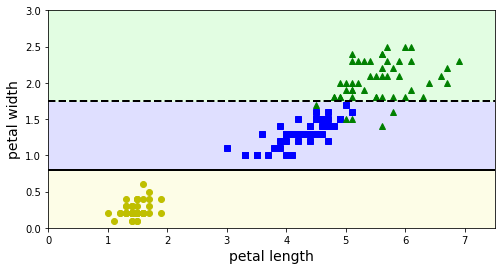

In [18]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)

plt.show()

The decision boundary is somewhat different from the previous one.

#### Referneces
Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems by Aurélien Géron  https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-5-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%AC/  https://colab.research.google.com/drive/1_rlfq67qpWGUWAraWxybrMkaO0GUtZp3#scrollTo=-Tvcj2KplTej

## Random Forest
Random forest is an ensemble of decision trees which applies bagging.

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.30, random_state=72)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

The make_moons() function is for binary classification and generates two moons. You can control how noisy the moon shapes and the number of samples to generate.

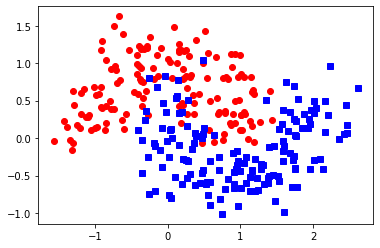

In [20]:
import matplotlib.pyplot as plt
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.show()

The generated data.

In [21]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [22]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

Text(0.5, 1.0, 'Decision Tree')

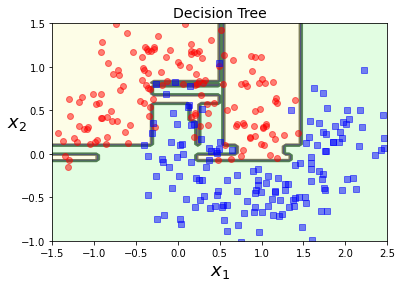

In [23]:
plt.figure(figsize=(6,4))
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)

In [24]:
tree_clf_m = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf_m.fit(X_train, y_train)
y_pred_tree_m = tree_clf_m.predict(X_test)

Text(0.5, 1.0, 'Decision Tree with max_depth=5')

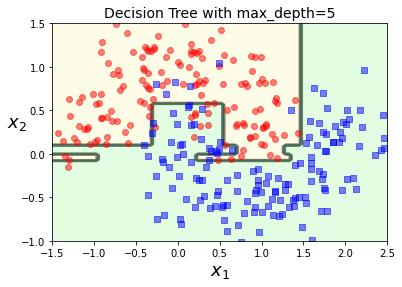

In [25]:
plt.figure(figsize=(6,4))
plot_decision_boundary(tree_clf_m, X, y)
plt.title("Decision Tree with max_depth=5", fontsize=14)

This is the result with limited 'max_depth'.

In [26]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=60, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

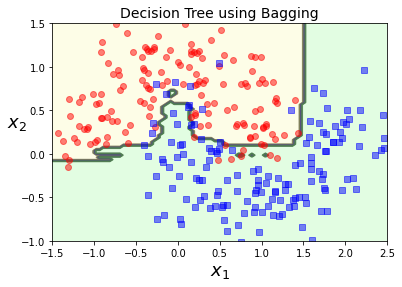

In [27]:
plt.figure(figsize=(6,4))
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Tree using Bagging", fontsize=14)
plt.show()

In [28]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

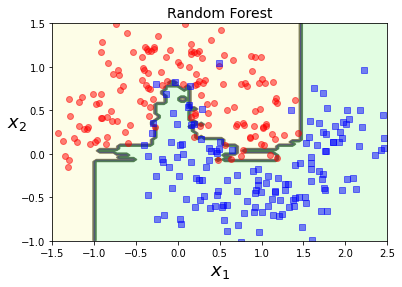

In [29]:
plt.figure(figsize=(6, 4))
plot_decision_boundary(rnd_clf, X, y)
plt.title("Random Forest", fontsize=14)
plt.show()

Unfortunately, we can not control sample size in 'RandomForestClassifier'. So we use 'BaggingClassifier' and 'DecisionTreeClassifier' for this.

In [31]:
bag_rnd_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', max_leaf_nodes=16), 
    n_estimators=500, max_samples=60,bootstrap=True, n_jobs=-1, random_state=40)
bag_rnd_clf.fit(X_train, y_train)
y_pred_rf_bg = bag_rnd_clf.predict(X_test)

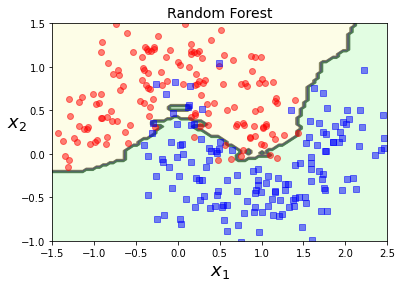

In [32]:
plt.figure(figsize=(6, 4))
plot_decision_boundary(bag_rnd_clf, X, y)
plt.title("Random Forest", fontsize=14)
plt.show()

In [33]:
from sklearn.metrics import accuracy_score

print('Accuracy for Decision Tree=', accuracy_score(y_test, y_pred_tree))
print('Accuracy for Decision Tree with max_depth 5=', accuracy_score(y_test, y_pred_tree_m))
print('Accuracy for Decision Tree using Bagging=', accuracy_score(y_test, y_pred))
print('Accuracy for Random Forest=', accuracy_score(y_test, y_pred_rf))
print('Accuracy for Random Forest_bg=', accuracy_score(y_test, y_pred_rf_bg))

Accuracy for Decision Tree= 0.8533333333333334
Accuracy for Decision Tree with max_depth 5= 0.8933333333333333
Accuracy for Decision Tree using Bagging= 0.9333333333333333
Accuracy for Random Forest= 0.9466666666666667
Accuracy for Random Forest_bg= 0.9466666666666667


'accuracy_score' computes the fraction(default) or the count(normalize=False) of the correct predictions.

### References
Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems by Aurélien Géron  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html  
https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/  
https://github.com/ExcelsiorCJH/Hands-On-ML/blob/master/Chap07-Ensemble_Learning_and_Random_Forests/Chap07-Ensemble_Learning_and_Random_Forests.ipynb